### HW8 Data Science _ MultiClass Classification
### Kiarash Gheisari Pour _ 402102302

In this assignment we're gonna go ahead the dermotology dataset related to skin diseases.<br>
This dataset is available at : 'https://archive.ics.uci.edu/dataset/33/dermatology'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dermatology.data' , header = None , na_values='?')
columns = [
    "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon", "polygonal_papules",
    "follicular_papules", "oral_mucosal_involvement", "knee_and_elbow_involvement", "scalp_involvement",
    "family_history", "melanin_incontinence", "eosinophils_in_the_infiltrate", "PNL_infiltrate",
    "fibrosis_of_the_papillary_dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis",
    "clubbing_of_the_rete_ridges", "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis",
    "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer",
    "vacuolisation_and_damage_of_basal_layer", "spongiosis", "saw_tooth_appearance_of_retes",
    "follicular_horn_plug", "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate",
    "band_like_infiltrate", "age", "class"
]

df.columns = columns

In [3]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [5]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


let's handle the missing age data by putting in the average of the group

In [4]:
df['age'] = df['age'].fillna(36.29)

given that are dataset is small , a little feature engineering wouldn't hurt.

In [5]:
df['involved_body_parts'] = df[
    ['oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement']
].sum(axis=1)

df['scaled_sum'] = df[
    ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
     'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
     'knee_and_elbow_involvement', 'scalp_involvement']
].sum(axis=1)

In [8]:
y = df.pop('class')

let's scale , split and start the learning phase

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df_scaled,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)

(256, 36)
(110, 36)


## SVC

In [13]:
from sklearn.svm import SVC

model  = SVC(C=1 , kernel='linear' , decision_function_shape='ovr' , max_iter=2000)
model.fit(X_train , y_train)

SVC(C=1, kernel='linear', max_iter=2000)

In [14]:
from sklearn.metrics import f1_score

predictions = model.predict(X_test)
f1_score(y_test , predictions , average='macro')


0.9565826330532213

## Logistic Regression

one versus rest : 

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None , multi_class='ovr' , max_iter=200)
model.fit(X_train , y_train)

c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr', penalty=None)

In [16]:
predictions = model.predict(X_test)
f1_score(y_test , predictions , average='macro')

0.9680779569892474

Multionomial Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None , multi_class='multinomial' , max_iter=200)
model.fit(X_train , y_train)

c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', penalty=None)

In [18]:
predictions = model.predict(X_test)
f1_score(y_test , predictions , average='macro')

0.9676071055381401

Calculating log loss

In [19]:
from sklearn.metrics import log_loss

y_proba = model.predict_proba(X_test)

loss = log_loss(y_test, y_proba)
print("Log Loss:", loss)

Log Loss: 0.17771568169572333


## KNN :

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3 , weights='distance')
model.fit(X_train , y_train)
predictions = model.predict(X_test)
f1_score(y_test , predictions , average='macro')

0.9676071055381401

let's tune the paramater n_neighbours : 

Text(0, 0.5, 'f1 score')

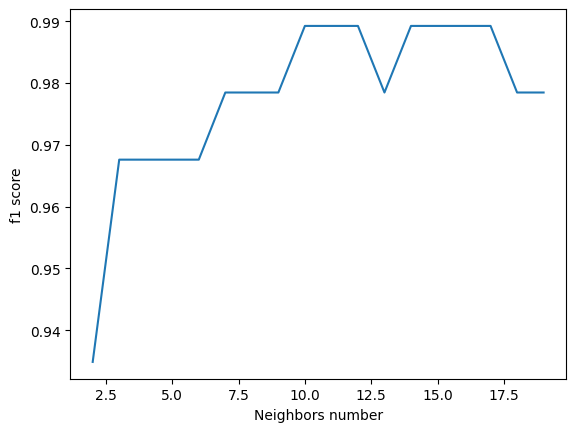

In [33]:
scores = []

for k in range(2 , 20):
    model = KNeighborsClassifier(n_neighbors=k , weights='distance')
    model.fit(X_train , y_train)
    predictions = model.predict(X_test)
    scores.append(f1_score(y_test , predictions , average='macro'))

neighbors = range(2,20)

plt.plot(neighbors , scores)
plt.xlabel('Neighbors number')
plt.ylabel('f1 score')

## Decision Tree :

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini' , max_depth= 5)
model.fit(X_train , y_train)

predictions = model.predict(X_test)
f1_score(y_test , predictions , average= 'macro')

0.9133818342151675

## Boosting algorithms : 


### XG Boost :

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50)
model.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.96


## Light GBM

In [40]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
model.fit(X_train,y_train,eval_metric=f1_score) 
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 34
[LightGBM] [Info] Start training from score -1.268511
[LightGBM] [Info] Start training from score -1.738515
[LightGBM] [Info] Start training from score -1.574886
[LightGBM] [Info] Start training from score -2.018817
[LightGBM] [Info] Start training from score -1.961659
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Cat Boost

In [41]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                          learning_rate=.3,
                          depth=5,
                          verbose=False,
                          )

model.fit(X_train,y_train) 
predictions = model.predict(X_test)
f1_score(y_test , predictions , average='macro')

0.9676071055381401